PySpark applications start with initializing SparkSession which is the entry point of PySpark as below.
-- In case of running it in PySpark shell via pyspark executable, the shell automatically creates the session in the variable spark for users.

In [63]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

Reading data from .csv with pyspark

In [64]:
df = spark.read.csv("YelloTaxiData.csv", header=True)

Showing the csv read

In [65]:
df.show()

+-----------+-----------+--------+------------------+------------------+-----+-----------+---------------------+-------+---------------+------------+------------------+------------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|RateCodeID0|RatecodeID1|VendorID|  dropoff_latitude| dropoff_longitude|extra|fare_amount|improvement_surcharge|mta_tax|passenger_count|payment_type|   pickup_latitude|  pickup_longitude|store_and_fwd_flag|tip_amount|tolls_amount|total_amount|tpep_dropoff_datetime|tpep_pickup_datetime|trip_distance|
+-----------+-----------+--------+------------------+------------------+-----+-----------+---------------------+-------+---------------+------------+------------------+------------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|        1.0|       NULL|       1|  40.7823371887207|-73.97216033935547|  0.0|        5.0|       

Printing Schema

In [119]:
df.printSchema()

root
 |-- VendorID: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- extra: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- trip_distance: double (nullable = true)



In [126]:
#change the data type of the columns
from pyspark.sql.types import DoubleType, IntegerType, DateType 
df = df.withColumn("passenger_count", df["passenger_count"].cast(DoubleType()))
df = df.withColumn("trip_distance", df["trip_distance"].cast(DoubleType()))
df = df.withColumn("fare_amount", df["fare_amount"].cast(DoubleType()))
df = df.withColumn("extra", df["extra"].cast(DoubleType()))
df = df.withColumn("mta_tax", df["mta_tax"].cast(DoubleType()))
df = df.withColumn("tip_amount", df["tip_amount"].cast(DoubleType()))
df = df.withColumn("tolls_amount", df["tolls_amount"].cast(DoubleType()))
df = df.withColumn("improvement_surcharge", df["improvement_surcharge"].cast(DoubleType()))
df = df.withColumn("total_amount", df["total_amount"].cast(IntegerType()))
df = df.withColumn("payment_type", df["payment_type"].cast(IntegerType()))
df = df.withColumn("dropoff_latitude", df["dropoff_latitude"].cast(DoubleType()))
df = df.withColumn("dropoff_longitude", df["dropoff_longitude"].cast(DoubleType()))
df = df.withColumn("pickup_latitude", df["pickup_latitude"].cast(DoubleType()))
df = df.withColumn("pickup_longitude", df["pickup_longitude"].cast(DoubleType()))
df = df.withColumn("tpep_dropoff_datetime", df["tpep_dropoff_datetime"].cast(DateType()))
df = df.withColumn("tpep_pickup_datetime", df["tpep_pickup_datetime"].cast(DateType()))
df = df.withColumn("trip_distance", df["trip_distance"].cast(DoubleType()))

In [127]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
df

VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
1,40.7823371887207,-73.97216033935547,0.0,5.0,0.3,0.5,1.0,2,40.7892951965332,-73.9666290283203,N,0.0,0.0,5,2015-01-09,2015-01-09,0.5
1,40.72048950195313,-73.94546508789062,0.5,12.5,0.3,0.5,1.0,1,40.72385025024415,-73.99256134033203,N,2.0,0.0,15,2015-01-13,2015-01-13,3.6
1,40.72136688232422,-73.99478149414062,0.0,14.5,0.3,0.5,2.0,2,40.74909973144531,-73.99195861816406,N,0.0,0.0,15,2015-01-25,2015-01-25,2.3
1,0.0,0.0,1.0,4.0,0.3,0.5,1.0,1,0.0,0.0,N,1.0,0.0,6,2015-01-22,2015-01-22,0.4
2,40.73711013793945,-73.99817657470702,0.0,4.5,0.3,0.5,1.0,1,40.733741760253906,-73.9903793334961,N,1.7,0.0,7,2015-01-17,2015-01-17,0.48
2,40.7244987487793,-73.84691619873048,1.0,17.5,0.3,0.5,1.0,1,40.76897048950195,-73.86266326904298,N,3.86,0.0,23,2015-01-29,2015-01-29,5.62
1,40.72303009033203,-73.98271942138672,0.5,5.0,0.3,0.5,1.0,1,40.72935485839844,-73.9898681640625,N,1.26,0.0,7,2015-01-21,2015-01-21,0.7
2,40.75390625,-73.97749328613281,0.5,4.5,0.3,0.5,3.0,2,40.76168823242188,-73.9750442504883,N,0.0,0.0,5,2015-01-10,2015-01-10,0.69
1,40.6449089050293,-73.77810668945312,0.0,52.0,0.3,0.5,2.0,1,40.75905990600585,-73.9869384765625,N,11.62,5.33,69,2015-01-31,2015-01-31,17.4
2,40.764610290527344,-73.9791488647461,0.0,52.0,0.3,0.5,1.0,2,40.64862823486328,-73.78453826904298,N,0.0,0.0,52,2015-01-31,2015-01-31,16.87


Viewing the columns

In [128]:
df.columns

['VendorID',
 'dropoff_latitude',
 'dropoff_longitude',
 'extra',
 'fare_amount',
 'improvement_surcharge',
 'mta_tax',
 'passenger_count',
 'payment_type',
 'pickup_latitude',
 'pickup_longitude',
 'store_and_fwd_flag',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'tpep_dropoff_datetime',
 'tpep_pickup_datetime',
 'trip_distance']

Selecting a column and showing the statistics summary

In [129]:
df.select('fare_amount','total_amount','tip_amount','trip_distance').describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|       fare_amount|      total_amount|        tip_amount|     trip_distance|
+-------+------------------+------------------+------------------+------------------+
|  count|           1446517|           1446517|           1446517|           1446517|
|   mean|12.913814970719313|15.512383193560808|1.6996653202140606| 12.39030648101611|
| stddev|12.846758195444355|15.946177034314989| 2.530122867462588|10062.647266617685|
|    min|            -230.0|              -230|              -5.0|               0.0|
|    max|            8010.0|              8010|             400.0|      1.20000015E7|
+-------+------------------+------------------+------------------+------------------+



Dropping columns

In [130]:
df = df.drop('RatecodeID1','RateCodeID0')

In [131]:
df.show()

+--------+------------------+------------------+-----+-----------+---------------------+-------+---------------+------------+------------------+------------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|VendorID|  dropoff_latitude| dropoff_longitude|extra|fare_amount|improvement_surcharge|mta_tax|passenger_count|payment_type|   pickup_latitude|  pickup_longitude|store_and_fwd_flag|tip_amount|tolls_amount|total_amount|tpep_dropoff_datetime|tpep_pickup_datetime|trip_distance|
+--------+------------------+------------------+-----+-----------+---------------------+-------+---------------+------------+------------------+------------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|       1|  40.7823371887207|-73.97216033935547|  0.0|        5.0|                  0.3|    0.5|            1.0|           2|  40.7892951965332| -73.9666290283203|      

In [132]:
num1 = df.filter(df.VendorID == 1).count()
num2 = df.filter(df.VendorID == 2).count()

In [133]:
if num1 > num2:
    print("Vendor 1 has more records")
else:
    print("Vendor 2 has more records")

Vendor 2 has more records


In [134]:
df.createOrReplaceTempView("tableA")
spark.sql("SELECT count(*)  as Total_Row from tableA").show()

+---------+
|Total_Row|
+---------+
|  1446517|
+---------+



In [135]:
spark.sql("Select * from tableA limit 10").show()   

+--------+------------------+------------------+-----+-----------+---------------------+-------+---------------+------------+------------------+------------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|VendorID|  dropoff_latitude| dropoff_longitude|extra|fare_amount|improvement_surcharge|mta_tax|passenger_count|payment_type|   pickup_latitude|  pickup_longitude|store_and_fwd_flag|tip_amount|tolls_amount|total_amount|tpep_dropoff_datetime|tpep_pickup_datetime|trip_distance|
+--------+------------------+------------------+-----+-----------+---------------------+-------+---------------+------------+------------------+------------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|       1|  40.7823371887207|-73.97216033935547|  0.0|        5.0|                  0.3|    0.5|            1.0|           2|  40.7892951965332| -73.9666290283203|      

In [136]:
spark.sql("Select VendorID, count(*) as Total_Rows from tableA group by VendorID").show()

+--------+----------+
|VendorID|Total_Rows|
+--------+----------+
|       1|    686686|
|       2|    759831|
+--------+----------+



In [137]:
spark.sql("Select distinct store_and_fwd_flag from tableA").show()

+------------------+
|store_and_fwd_flag|
+------------------+
|                 Y|
|                 N|
+------------------+



In [138]:
spark.sql("Select min(fare_amount) as Min_Fare, max(fare_amount) as Max_Fare, avg(fare_amount) as Avg_Fare from tableA").show()

+--------+--------+------------------+
|Min_Fare|Max_Fare|          Avg_Fare|
+--------+--------+------------------+
|  -230.0|  8010.0|12.913814970719313|
+--------+--------+------------------+



In [139]:
spark.sql("Select * from tableA where fare_amount < 0 and trip_distance > 0.5 limit 5").show()

+--------+------------------+------------------+-----+-----------+---------------------+-------+---------------+------------+------------------+------------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|VendorID|  dropoff_latitude| dropoff_longitude|extra|fare_amount|improvement_surcharge|mta_tax|passenger_count|payment_type|   pickup_latitude|  pickup_longitude|store_and_fwd_flag|tip_amount|tolls_amount|total_amount|tpep_dropoff_datetime|tpep_pickup_datetime|trip_distance|
+--------+------------------+------------------+-----+-----------+---------------------+-------+---------------+------------+------------------+------------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|       2| 40.73163986206055|-73.86598205566406|  0.0|       -4.0|                  0.3|   -0.5|            1.0|           3| 40.73107147216797|-73.86441040039062|      

In [140]:
spark.sql("Select * from tableA where fare_amount = -230.0 limit 5").show()

+--------+-----------------+-----------------+-----+-----------+---------------------+-------+---------------+------------+-----------------+-----------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|VendorID| dropoff_latitude|dropoff_longitude|extra|fare_amount|improvement_surcharge|mta_tax|passenger_count|payment_type|  pickup_latitude| pickup_longitude|store_and_fwd_flag|tip_amount|tolls_amount|total_amount|tpep_dropoff_datetime|tpep_pickup_datetime|trip_distance|
+--------+-----------------+-----------------+-----+-----------+---------------------+-------+---------------+------------+-----------------+-----------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+
|       2|40.91621017456055|-74.0748291015625|  0.0|     -230.0|                 -0.3|   -0.5|            3.0|           3|40.91622543334961|-74.0748291015625|                 N|   

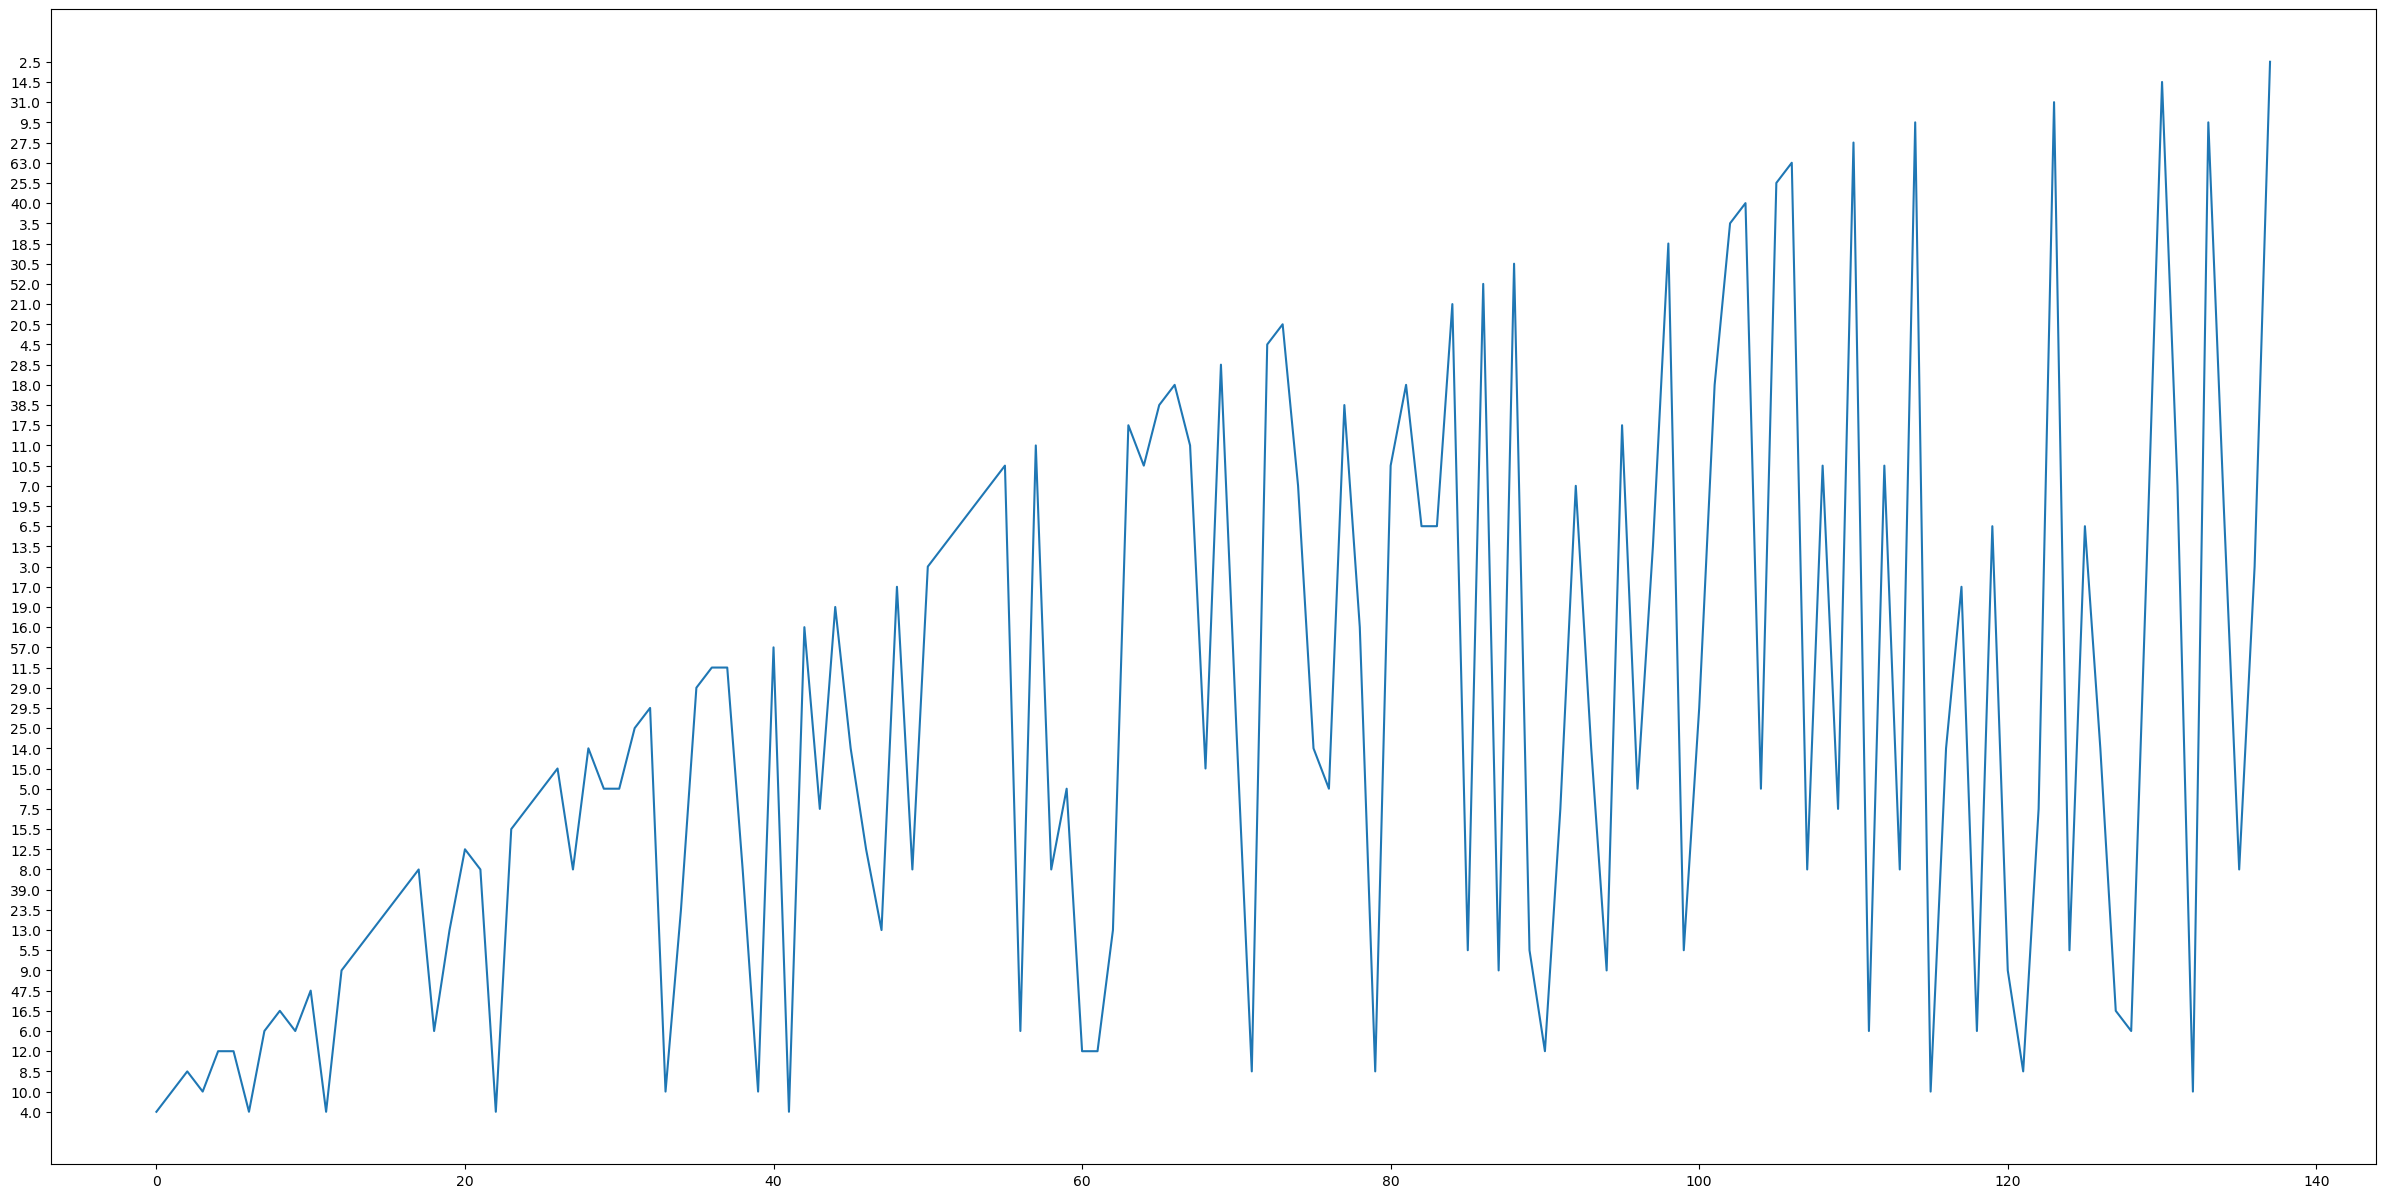

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample the DataFrame to reduce its size
df_sample = df.sample(fraction=0.0001, seed=42)

# Convert the sampled PySpark DataFrame to Pandas DataFrame
df_ = df_sample.toPandas()

plt.figure(figsize=(30,15))
plt.plot(df_['fare_amount'])

In [ ]:
df.createOrReplaceTempView("tableB")
spark.sql("SELECT count(*) from tableB").show()

In [57]:
# Clear the SparkSession cache and delete the underlying `sparkContext`
#spark.stop()

# SparkSQL

In [81]:
from pyspark.sql import SparkSession

# Create a new SparkSession
spark = SparkSession\
    .builder\
    .config('spark.app.name', 'learning_spark_sql')\
    .getOrCreate()



In [82]:
spark

In [60]:
# Clear the SparkSession cache and delete the underlying `sparkContext`
spark.stop()